In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:
model = keras.Sequential(
    [
        layers.Conv2D(32,(3,3),activation="relu",padding="same",input_shape=(28,28,1)),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Flatten(),
        layers.Dense(10,activation="softmax")
    ]
)

In [3]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [4]:
#scale the images to [0,1] range
x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255

#add a channe; dimension to the images
x_train = np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test,-1)

#split the training set into training and validation sets
x_train,x_val = x_train[:50000],x_train[:50000]
y_train,y_val = y_train[:50000],y_train[:50000]

In [9]:
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    horizontal_flip=False,
    vertical_flip=False,
)

In [10]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics="accuracy")

In [11]:
#without data augmentation
history = model.fit(x_train,y_train,batch_size=32,epochs=5,validation_data=(x_test,y_test))

Epoch 1/5
1563/1563 [==============================] - 12s 7ms/step - loss: 0.2279 - accuracy: 0.9350 - val_loss: 0.0901 - val_accuracy: 0.9741
Epoch 2/5
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0821 - accuracy: 0.9761 - val_loss: 0.0681 - val_accuracy: 0.9801
Epoch 3/5
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0625 - accuracy: 0.9807 - val_loss: 0.0751 - val_accuracy: 0.9756
Epoch 4/5
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0520 - accuracy: 0.9837 - val_loss: 0.0664 - val_accuracy: 0.9781
Epoch 5/5
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0436 - accuracy: 0.9868 - val_loss: 0.0622 - val_accuracy: 0.9806


In [12]:
#With data augmentation
history2 = model.fit(datagen.flow(x_train,y_train,batch_size=32),epochs=5,validation_data=(x_test,y_test))

Epoch 1/5
1563/1563 [==============================] - 17s 11ms/step - loss: 0.2754 - accuracy: 0.9162 - val_loss: 0.0872 - val_accuracy: 0.9740
Epoch 2/5
1563/1563 [==============================] - 17s 11ms/step - loss: 0.1993 - accuracy: 0.9402 - val_loss: 0.0941 - val_accuracy: 0.9715
Epoch 3/5
1563/1563 [==============================] - 17s 11ms/step - loss: 0.1771 - accuracy: 0.9464 - val_loss: 0.1108 - val_accuracy: 0.9657
Epoch 4/5
1563/1563 [==============================] - 17s 11ms/step - loss: 0.1659 - accuracy: 0.9493 - val_loss: 0.0810 - val_accuracy: 0.9754
Epoch 5/5
1563/1563 [==============================] - 17s 11ms/step - loss: 0.1573 - accuracy: 0.9519 - val_loss: 0.0707 - val_accuracy: 0.9806


In [13]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0707 - accuracy: 0.9806


[0.07070541381835938, 0.9805999994277954]

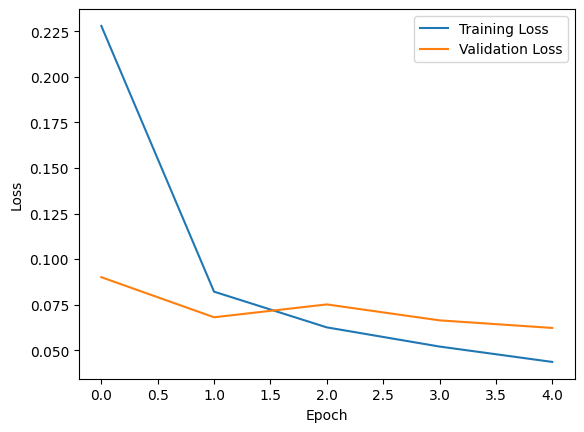

In [17]:
#Without augmenting
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label="Training Loss")
plt.plot(history.history['val_loss'],label="Validation Loss")
plt.xlabel('Epoch')
plt.ylabel("Loss")
plt.legend()
plt.show()

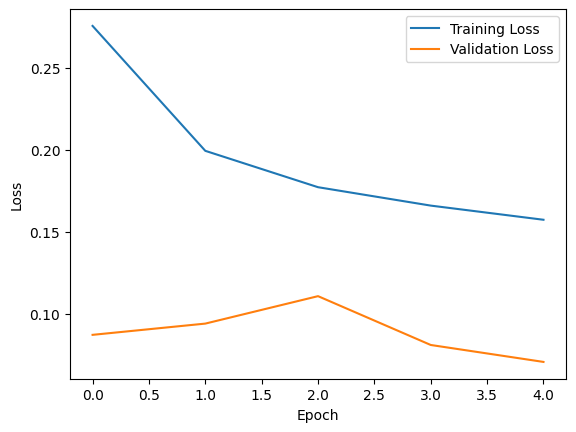

In [18]:
#With Augmentation
plt.plot(history2.history['loss'],label="Training Loss")
plt.plot(history2.history['val_loss'],label="Validation Loss")
plt.xlabel('Epoch')
plt.ylabel("Loss")
plt.legend()
plt.show()